In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [54]:
le_parent=LabelEncoder()
le_test_prep=LabelEncoder()
df['parental level of education']=le_parent.fit_transform(df['parental level of education'])
df['test preparation course']=le_test_prep.fit_transform(df['test preparation course'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,standard,1,72,72,74
1,female,group C,4,standard,0,69,90,88
2,female,group B,3,standard,1,90,95,93
3,male,group A,0,free/reduced,1,47,57,44
4,male,group C,4,standard,1,76,78,75


In [55]:
np.random.seed(42)
df['study_time'] = np.random.randint(1, 11, df.shape[0])

In [56]:
X=df[['parental level of education','test preparation course','study_time']]
y=df['math score']
model=LinearRegression()
model.fit(X,y)
pred_value=model.predict([[1,0,6]])
print(pred_value)

[70.27136901]


d:\downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
X1=df[['parental level of education']]
y1=df['math score']
model1=LinearRegression()
model1.fit(X1,y1)
pred_value1=model1.predict([[1]])
print(pred_value1)

[66.92992532]


d:\downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
X2=df[['test preparation course']]
y2=df['math score']
model2=LinearRegression()
model2.fit(X2,y2)
pred_value2=model2.predict([[0]])
print(pred_value2)

[69.69553073]


d:\downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
X3=df[['study_time']]
y3=df['math score']
model3=LinearRegression()
model3.fit(X3,y3)
pred_value3=model3.predict([[6]])
print(pred_value3)

[65.78731188]


d:\downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


the variable which most important influences the student performance is 'test preparation course'


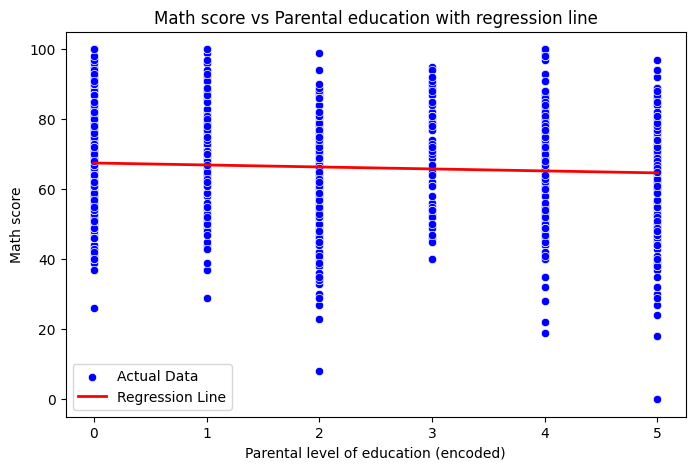

In [60]:
X1 = df[['parental level of education']].copy()
y = df['math score']
model1 = LinearRegression().fit(X1, y)
y_pred1 = model1.predict(X1)

# sort by X for a smooth line
order = np.argsort(X1['parental level of education'].values)
plt.figure(figsize=(8,5))
sns.scatterplot(x=X1['parental level of education'], y=y, color='blue', label='Actual Data')
plt.plot(X1['parental level of education'].values[order], y_pred1[order], color='red', linewidth=2, label='Regression Line')
plt.xlabel('Parental level of education (encoded)')
plt.ylabel('Math score')
plt.legend()
plt.title('Math score vs Parental education with regression line')
plt.show()

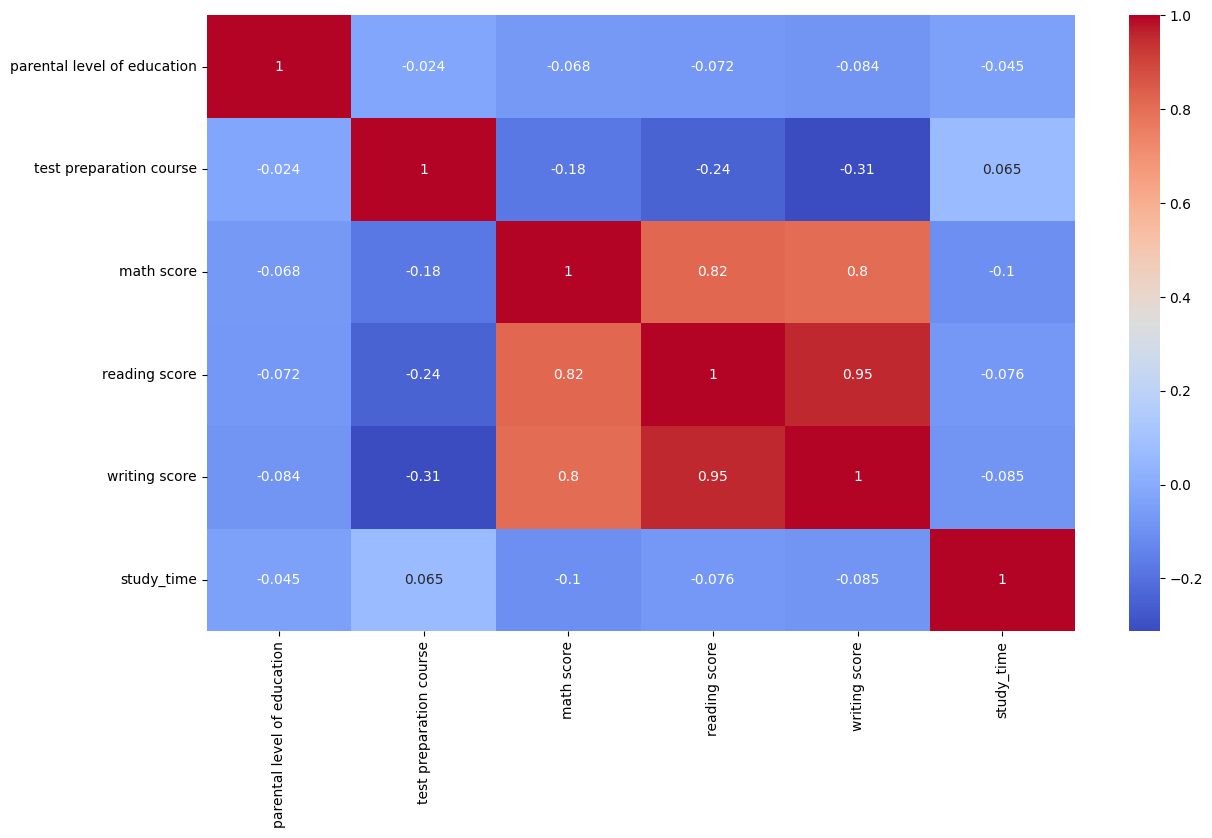

In [61]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,cmap='coolwarm', annot=True)
plt.show()

parental level of education   -0.030147
test preparation course       -0.593282
math score                    -0.278935
reading score                 -0.259105
writing score                 -0.289444
study_time                     0.020499
dtype: float64


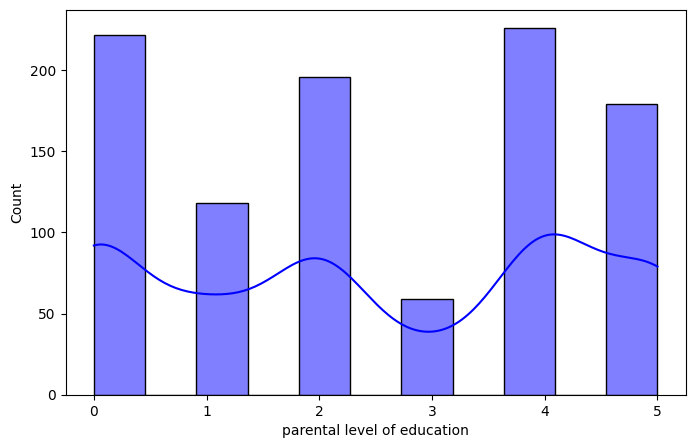

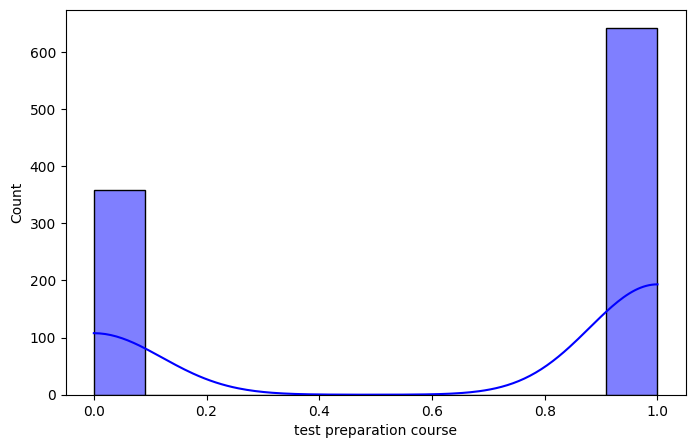

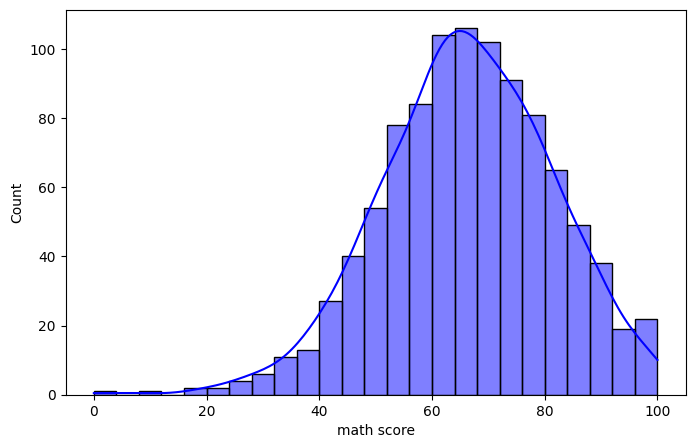

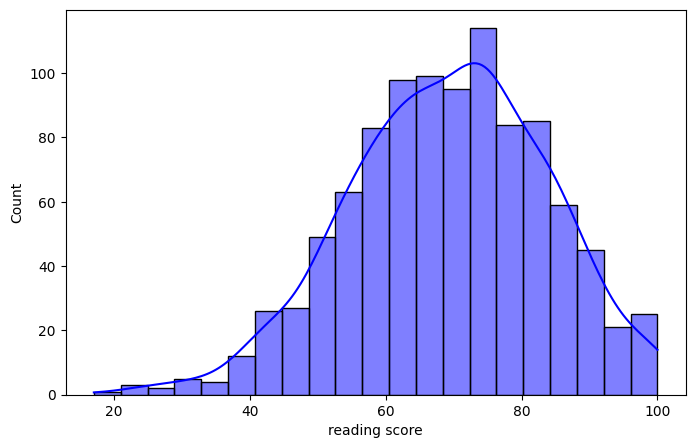

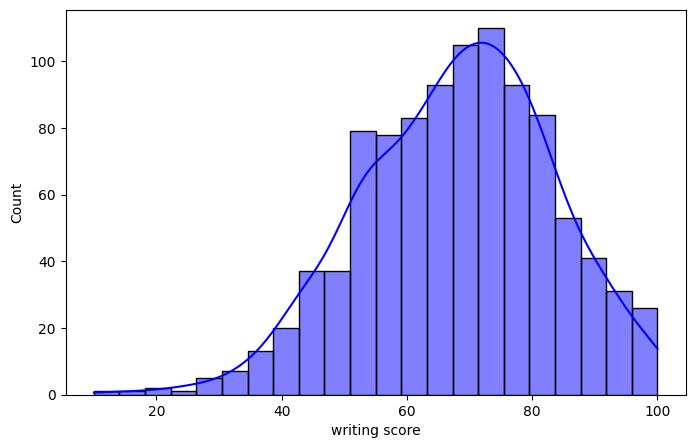

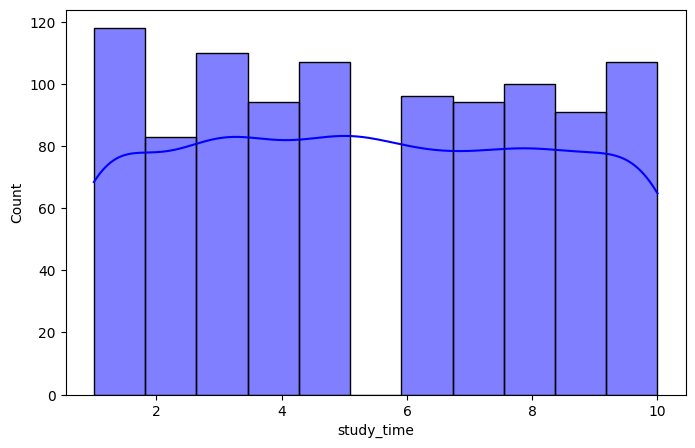

In [65]:
num_col=df.select_dtypes(include=np.number)
print(num_col.skew())
for col in num_col:
    plt.figure(figsize=(8,5))
    sns.histplot(num_col[col], kde=True,color='blue')
    plt.show()
